In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
# Set your dataset path
base_path = "D:/ujjwal/programming/Deep Learning/archive/Testing"

# Categories (folder names = class labels)
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize lists
X_train = []
Y_train = []

# Image size (you can modify this)
IMG_SIZE = 150

# Read images
for label, category in enumerate(categories):
    folder_path = os.path.join(base_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X_train.append(img)
            Y_train.append(label)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")

base_path = "D:/ujjwal/programming/Deep Learning/archive/Training"

# Read images
for label, category in enumerate(categories):
    folder_path = os.path.join(base_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X_train.append(img)
            Y_train.append(label)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")

# Convert to NumPy arrays
X = np.array(X_train)
Y = np.array(Y_train)

print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (7023, 150, 150, 3)
Y shape: (7023,)


In [3]:
Y = Y.reshape(len(Y), 1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (7023, 150, 150, 3)
Y shape: (7023, 1)


In [4]:
X = X / 255.0

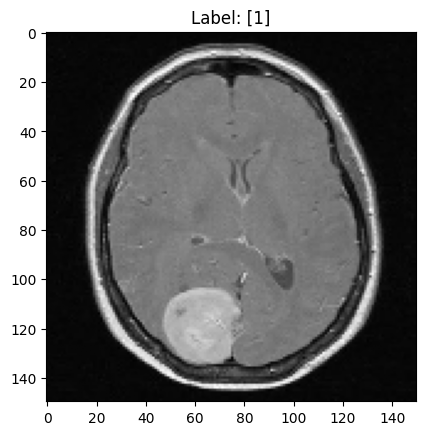

In [5]:
idx = random.randint(0, len(X) - 1)
plt.imshow(X[idx])
plt.title(f"Label: {Y[idx]}")
plt.show()

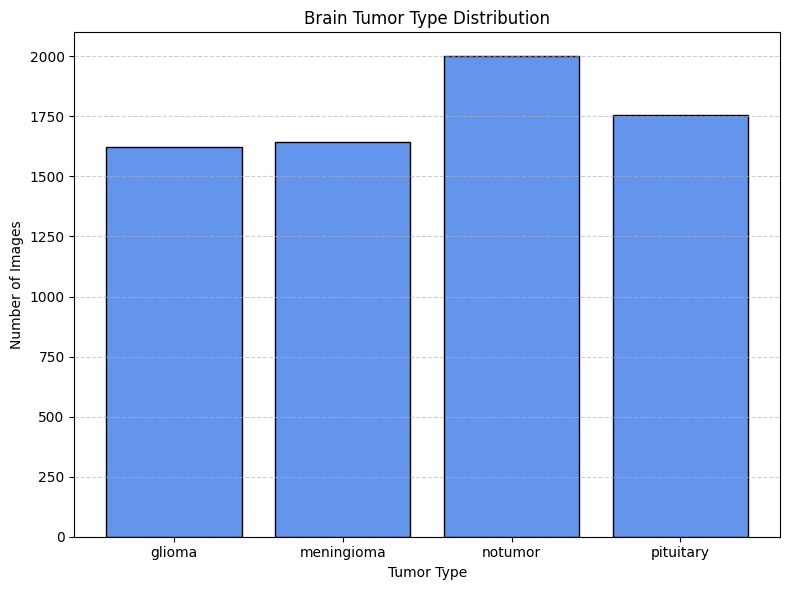

In [6]:
# Category names based on encoded labels
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Count the frequency of each label in y_train
unique, counts = np.unique(Y, return_counts=True)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color='cornflowerblue', edgecolor='black')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.title('Brain Tumor Type Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

In [8]:
# Shape and dtype
print("X_train shape:", X_train.shape)
print("X_train dtype:", X_train.dtype)
print("Y_train shape:", Y_train.shape)
print("Y_train dtype:", Y_train.dtype)

# Memory usage
print(f"X_train size: {X_train.nbytes / (1024 ** 2):.2f} MB")
print(f"Y_train size: {Y_train.nbytes / (1024 ** 2):.2f} MB")

X_train shape: (5618, 150, 150, 3)
X_train dtype: float64
Y_train shape: (5618, 1)
Y_train dtype: int64
X_train size: 2893.18 MB
Y_train size: 0.04 MB


In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
model = Sequential([
    Input(shape=(150, 150, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # prevents overfitting

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # use categorical_crossentropy if labels are one-hot encoded
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,411,204 (20.64 MB)

 Trainable params: 5,410,756 (20.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.fit(X_train, Y_train, epochs=15, batch_size=32)


Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 450ms/step - accuracy: 0.5409 - loss: 1.4408
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 460ms/step - accuracy: 0.6961 - loss: 0.7915
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 463ms/step - accuracy: 0.7259 - loss: 0.6798
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 87s 495ms/step - accuracy: 0.7870 - loss: 0.5544
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 465ms/step - accuracy: 0.8062 - loss: 0.5083
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 80s 457ms/step - accuracy: 0.8327 - loss: 0.4111
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 79s 450ms/step - accuracy: 0.8507 - loss: 0.3845
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 79s 449ms/step - accuracy: 0.8723 - loss: 0.3418
Epoch 9/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 84s 479ms/step - accuracy: 0.8860 - loss: 0.3087
Epoch 10/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 459ms/step - accuracy: 0.9045 - loss: 0.2538
Epoch 11/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 465ms/step - accuracy: 0.9172 - loss: 0.2226
Epoch 12/15
176/176

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=32)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9458 - loss: 0.1567
Test Accuracy: 0.9523
Test Loss: 0.1692


In [10]:
X = X.astype('float32')

In [11]:
model = Sequential([
    Input(shape=(150, 150, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # prevents overfitting

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # use categorical_crossentropy if labels are one-hot encoded
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,411,204 (20.64 MB)

 Trainable params: 5,410,756 (20.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.fit(X, Y, epochs=15, batch_size=32)

Epoch 1/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 115s 508ms/step - accuracy: 0.5499 - loss: 1.4178
Epoch 2/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 102s 463ms/step - accuracy: 0.7241 - loss: 0.6884
Epoch 3/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 461ms/step - accuracy: 0.7659 - loss: 0.5973
Epoch 4/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 101s 459ms/step - accuracy: 0.8284 - loss: 0.4681
Epoch 5/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 99s 451ms/step - accuracy: 0.8450 - loss: 0.3998
Epoch 6/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 99s 451ms/step - accuracy: 0.8761 - loss: 0.3501
Epoch 7/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 99s 452ms/step - accuracy: 0.8845 - loss: 0.3271
Epoch 8/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 99s 449ms/step - accuracy: 0.9121 - loss: 0.2553
Epoch 9/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 103s 469ms/step - accuracy: 0.9190 - loss: 0.2360
Epoch 10/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 99s 452ms/step - accuracy: 0.9323 - loss: 0.2048
Epoch 11/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 100s 455ms/step - accuracy: 0.9376 - loss: 0.1922
Epoch 12/15
2

In [13]:
model.save("cnn_model.h5")

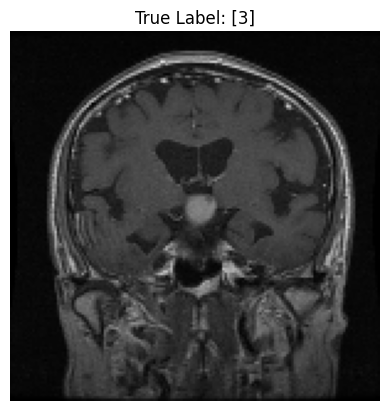

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: 3


In [17]:
# Randomly select an index
idx = random.randint(0, len(X) - 1)
image = X[idx]
true_label = Y[idx]

# Display the image
plt.imshow(image)
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

# Prepare image for prediction (add batch dimension)
image_input = np.expand_dims(image, axis=0)  # Shape: (1, height, width, channels)

# Predict
prediction = model.predict(image_input)
predicted_class = np.argmax(prediction, axis=1)[0]  # Get class index

print(f"Predicted Label: {predicted_class}")
